1. Introduction
Credit default risk is simply known as the possibility of a loss for a lender due to a borrower’s failure to repay a loan. Credit analysts are typically responsible for assessing this risk by thoroughly analyzing a borrower’s capability to repay a loan — but long gone are the days of credit analysts, it’s the machine learning age! Machine learning algorithms have a lot to offer to the world of credit risk assessment due to their unparalleled predictive power and speed. In this article, we will be utilizing machine learning’s power to predict whether a borrower will default on a loan or not and to predict their probability of default. Let’s get started.

2. Dataset
The dataset we’re using can be found on Kaggle and it contains data for 32,581 borrowers and 11 variables related to each borrower. Let’s have a look at what those variables are:

Age — numerical variable; age in years
Income — numerical variable; annual income in dollars
Home status — categorical variable; “rent”, “mortgage” or “own”
Employment length — numerical variable; employment length in years
Loan intent — categorical variable; “education”, “medical”, “venture”, “home improvement”, “personal” or “debt consolidation”
Loan amount — numerical variable; loan amount in dollars
Loan grade — categorical variable; “A”, “B”, “C”, “D”, “E”, “F” or “G”
Interest rate — numerical variable; interest rate in percentage
Loan to income ratio — numerical variable; between 0 and 1
Historical default — binary, categorical variable; “Y” or “N”
Loan status — binary, numerical variable; 0 (no default) or 1 (default) → this is going to be our target variable
Now that we know what kind of variables we’re dealing with here, let’s get to the nitty-gritty of things.

3. Data exploration and preprocessing
First, let’s go ahead and check for missing values in our dataset.

# Importing all required Libraries

In [1]:
# importing all required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
# Reading the csv file
df = pd.read_csv(r"C:\Users\mouni\Downloads\credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Data Cleaning:

In [3]:
# The values in loan_status are replaced 1 with 'yes' and 0 with 'no'
loan_status = df["loan_status"].apply(lambda x:"yes" if x==1 else("no" if x==0 else x))

In [4]:
df['loan_status'] = loan_status

In [5]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,yes,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,no,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,yes,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,yes,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,yes,0.55,Y,4


In [6]:
# no:of rows and columns
df.shape

(32581, 12)

In [7]:
# checking the duplicates count in the DataFrame
df.duplicated().sum()

165

In [8]:
# droping the duplicates from the DF
df.drop_duplicates(inplace = True)

In [9]:
# top 5 records
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,yes,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,no,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,yes,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,yes,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,yes,0.55,Y,4


In [10]:
# shape of a DF
df.shape

(32416, 12)

In [11]:
# checking the null values count in each column of a DF
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
# Droping the null values
df.dropna(inplace = True)

In [13]:
# after droping the null values, again checking for null values and showing that there is no null values in a DF
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [14]:
# showing that there is no duplicates in a DF
df.duplicated().sum()

0

In [15]:
# Top 5 Records
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,yes,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,no,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,yes,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,yes,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,yes,0.55,Y,4


In [16]:
# info() gives all the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28501 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28501 non-null  int64  
 1   person_income               28501 non-null  int64  
 2   person_home_ownership       28501 non-null  object 
 3   person_emp_length           28501 non-null  float64
 4   loan_intent                 28501 non-null  object 
 5   loan_grade                  28501 non-null  object 
 6   loan_amnt                   28501 non-null  int64  
 7   loan_int_rate               28501 non-null  float64
 8   loan_status                 28501 non-null  object 
 9   loan_percent_income         28501 non-null  float64
 10  cb_person_default_on_file   28501 non-null  object 
 11  cb_person_cred_hist_length  28501 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.8+ MB


In [17]:
# removing outliers in person age column by using IQR Method
Q1 = df['person_age'].quantile(0.25)
Q3 = df['person_age'].quantile(0.75)
IQR = Q3 - Q1
bmi_lower_bound = Q1 - 1.5*IQR
bmi_upper_bound = Q3 + 1.5*IQR
df = df[(df['person_age'] > bmi_lower_bound)&(df['person_age']<bmi_upper_bound)]
print(df.shape)

(27205, 12)


In [18]:
# removing outliers in person income column by using IQR Method
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1
bmi_lower_bound = Q1 - 1.5*IQR
bmi_upper_bound = Q3 + 1.5*IQR
df = df[(df['person_income'] > bmi_lower_bound) & (df['person_income'] < bmi_upper_bound)]
print(df.shape)

(25991, 12)


In [19]:
# removing outliers in person_emp_length column by using IQR Method
Q1 = df['person_emp_length'].quantile(0.25)
Q3 = df['person_emp_length'].quantile(0.75)
IQR = Q3 - Q1
bmi_lower_bound = Q1 - 1.5*IQR
bmi_upper_bound = Q3 + 1.5*IQR
df = df[(df['person_emp_length'] > bmi_lower_bound)&(df['person_emp_length']<bmi_upper_bound)]
print(df.shape)

(25428, 12)


In [20]:
# removing outliers in loan amount column by using IQR Method
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
bmi_lower_bound = Q1 - 1.5*IQR
bmi_upper_bound = Q3 + 1.5*IQR
df = df[(df['loan_amnt'] > bmi_lower_bound)&(df['loan_amnt']<bmi_upper_bound)]
print(df.shape)

(24314, 12)


In [21]:
# removing outliers in loan_int_rate column by using IQR Method
Q1 = df['loan_int_rate'].quantile(0.25)
Q3 = df['loan_int_rate'].quantile(0.75)
IQR = Q3 - Q1
bmi_lower_bound = Q1 - 1.5*IQR
bmi_upper_bound = Q3 + 1.5*IQR
df = df[(df['loan_int_rate'] > bmi_lower_bound)&(df['loan_int_rate']<bmi_upper_bound)]
print(df.shape)

(24304, 12)


In [22]:
# removing outliers in loan_percent_income column by using IQR Method
Q1 = df['loan_percent_income'].quantile(0.25)
Q3 = df['loan_percent_income'].quantile(0.75)
IQR = Q3 - Q1
bmi_lower_bound = Q1 - 1.5*IQR
bmi_upper_bound = Q3 + 1.5*IQR
df = df[(df['loan_percent_income'] > bmi_lower_bound)&(df['loan_percent_income']<bmi_upper_bound)]
print(df.shape)

(23686, 12)


In [23]:
# removing outliers in cb_person_cred_hist_length column by using IQR Method
Q1 = df['cb_person_cred_hist_length'].quantile(0.25)
Q3 = df['cb_person_cred_hist_length'].quantile(0.75)
IQR = Q3 - Q1
bmi_lower_bound = Q1 - 1.5*IQR
bmi_upper_bound = Q3 + 1.5*IQR
df = df[(df['cb_person_cred_hist_length'] > bmi_lower_bound)&(df['cb_person_cred_hist_length']<bmi_upper_bound)]
print(df.shape)

(22765, 12)


                                or

In [24]:
# this code is only for train data in ML. this code removes all outliers from all the numerical columns of a dataframe except target variable outliers. 
'''
calculate the IQR values for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

remove Outliers from X_train
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]
'''

'\ncalculate the IQR values for each column\nQ1 = df.quantile(0.25)\nQ3 = df.quantile(0.75)\nIQR = Q3 - Q1\n\nremove Outliers from X_train\ndf = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]\n'

# Data Exploration

In [25]:
# Top 5 Records of a DataFrame
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,no,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,yes,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,yes,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,yes,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,no,0.14,N,3


In [26]:
# shape of a DF
df.shape

(22765, 12)

In [27]:
# All column names in a DF
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [28]:
# no:of columns in a DF
len(df.columns)

12

In [29]:
# row indexes of DF
df.index

Int64Index([    1,     5,     9,    19,    23,    27,    29,    30,    35,
               41,
            ...
            32185, 32193, 32194, 32203, 32208, 32215, 32222, 32230, 32243,
            32248],
           dtype='int64', length=22765)

In [30]:
df.count()

person_age                    22765
person_income                 22765
person_home_ownership         22765
person_emp_length             22765
loan_intent                   22765
loan_grade                    22765
loan_amnt                     22765
loan_int_rate                 22765
loan_status                   22765
loan_percent_income           22765
cb_person_default_on_file     22765
cb_person_cred_hist_length    22765
dtype: int64

In [31]:
# The Data Types of Each Column in a DF
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                    object
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [32]:
# It gives all the information about the DF
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22765 entries, 1 to 32248
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  22765 non-null  int64  
 1   person_income               22765 non-null  int64  
 2   person_home_ownership       22765 non-null  object 
 3   person_emp_length           22765 non-null  float64
 4   loan_intent                 22765 non-null  object 
 5   loan_grade                  22765 non-null  object 
 6   loan_amnt                   22765 non-null  int64  
 7   loan_int_rate               22765 non-null  float64
 8   loan_status                 22765 non-null  object 
 9   loan_percent_income         22765 non-null  float64
 10  cb_person_default_on_file   22765 non-null  object 
 11  cb_person_cred_hist_length  22765 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.3+ MB


In [33]:
# it returns the discription of all the numerical columns in a DF
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,22765.000000,22765.000000,22765.000000,22765.000000,22765.000000,22765.000000,22765.000000
mean,26.102394,58156.461937,4.352866,8396.444103,10.937707,0.159301,4.766484
std,3.847209,26547.091394,3.366987,4826.153873,3.190889,0.089401,2.616959
min,20.000000,4080.000000,0.000000,500.000000,5.420000,0.010000,2.000000
25%,23.000000,38060.000000,2.000000,4925.000000,7.880000,0.090000,3.000000
50%,25.000000,54000.000000,4.000000,7500.000000,10.990000,0.140000,4.000000
75%,28.000000,74000.000000,7.000000,11500.000000,13.350000,0.210000,7.000000
max,40.000000,140900.000000,14.000000,22400.000000,21.360000,0.410000,12.000000


In [34]:
# Selecting all the numerical columns from the DataFrame
df.select_dtypes(include = 'number')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
1,21,9600,5.0,1000,11.14,0.10,2
5,21,9900,2.0,2500,7.14,0.25,2
9,21,10000,6.0,1600,14.74,0.16,3
19,24,10800,8.0,1750,10.99,0.16,2
23,24,10980,0.0,1500,7.29,0.14,3
...,...,...,...,...,...,...,...
32215,39,24000,1.0,8500,7.49,0.35,12
32222,36,136000,0.0,4800,14.72,0.04,12
32230,37,65000,7.0,12000,13.98,0.18,12
32243,37,68480,2.0,3600,15.23,0.05,11


In [35]:
# Selecting all the categorical columns from the DataFrame
df.select_dtypes(include = 'object')

,person_home_ownership,loan_intent,loan_grade,loan_status,cb_person_default_on_file
1,OWN,EDUCATION,B,no,N
5,OWN,VENTURE,A,yes,N
9,OWN,VENTURE,D,yes,N
19,MORTGAGE,EDUCATION,B,yes,N
23,OWN,PERSONAL,A,no,N
...,...,...,...,...,...
32215,RENT,DEBTCONSOLIDATION,A,yes,N
32222,MORTGAGE,EDUCATION,C,no,Y
32230,RENT,HOMEIMPROVEMENT,C,no,N
32243,RENT,MEDICAL,C,no,Y


In [36]:
# It gives unique values count of person_home_ownership column in a DF
df['person_home_ownership'].value_counts()

RENT        12059
MORTGAGE     8933
OWN          1701
OTHER          72
Name: person_home_ownership, dtype: int64

In [37]:
# No:of Unique values in a person_home_ownership column
len(df['person_home_ownership'].value_counts())

4

             or

In [38]:
# No:of Unique values in a person_home_ownership column
df['person_home_ownership'].value_counts().count()

4

            or

In [39]:
# No:of Unique values in a person_home_ownership column
df['person_home_ownership'].nunique()

4

In [40]:
# Unique values in a person_home_ownership column
df['person_home_ownership'].unique()

array(['OWN', 'MORTGAGE', 'OTHER', 'RENT'], dtype=object)

In [41]:
# Unique values in a loan_intent column
df['loan_intent'].unique()

array(['EDUCATION', 'VENTURE', 'PERSONAL', 'MEDICAL', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [42]:
#no:of unique values in a loan_intent column
df['loan_intent'].nunique()

6

In [43]:
# It gives unique values count of loan_intent column in a DF
df['loan_intent'].value_counts()

EDUCATION            4721
MEDICAL              4244
VENTURE              3955
PERSONAL             3803
DEBTCONSOLIDATION    3622
HOMEIMPROVEMENT      2420
Name: loan_intent, dtype: int64

In [44]:
# Unique values in a loan_grade column
df['loan_grade'].unique()

array(['B', 'A', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [45]:
# no:of Unique Values in a loan_grade column
df['loan_grade'].nunique()

7

In [46]:
# It gives unique values count of loan_grade column in a DF
df['loan_grade'].value_counts()

A    7734
B    7164
C    4663
D    2434
E     629
F     114
G      27
Name: loan_grade, dtype: int64

In [47]:
#unique values in a cb_person_default_on_file column
df['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [48]:
# no:of unique values in a cb_person_default_on_file column
df['cb_person_default_on_file'].nunique()

2

In [49]:
# It gives unique values count of  cb_person_default_on_file column in a DF
df['cb_person_default_on_file'].value_counts()

N    18792
Y     3973
Name: cb_person_default_on_file, dtype: int64

In [50]:
df['loan_status']

1         no
5        yes
9        yes
19       yes
23        no
        ... 
32215    yes
32222     no
32230     no
32243     no
32248     no
Name: loan_status, Length: 22765, dtype: object

In [51]:
# It gives unique values count of loan_status column in a DF
df['loan_status'].value_counts()

no     18193
yes     4572
Name: loan_status, dtype: int64

# Data Visualization

# Using Matplotlib and Seaborn Libraries:

# Uni-Variate Data Analysis:

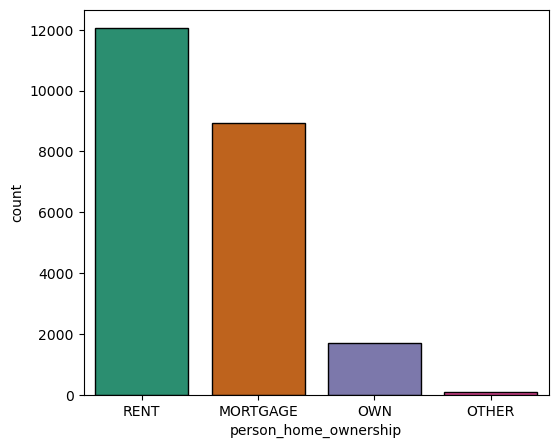

In [52]:
plt.figure(figsize = (6,5))
sns.countplot(x = 'person_home_ownership', data = df, palette = 'Dark2', edgecolor = 'k', order = ['RENT', 'MORTGAGE', 'OWN', 'OTHER'])
plt.show();

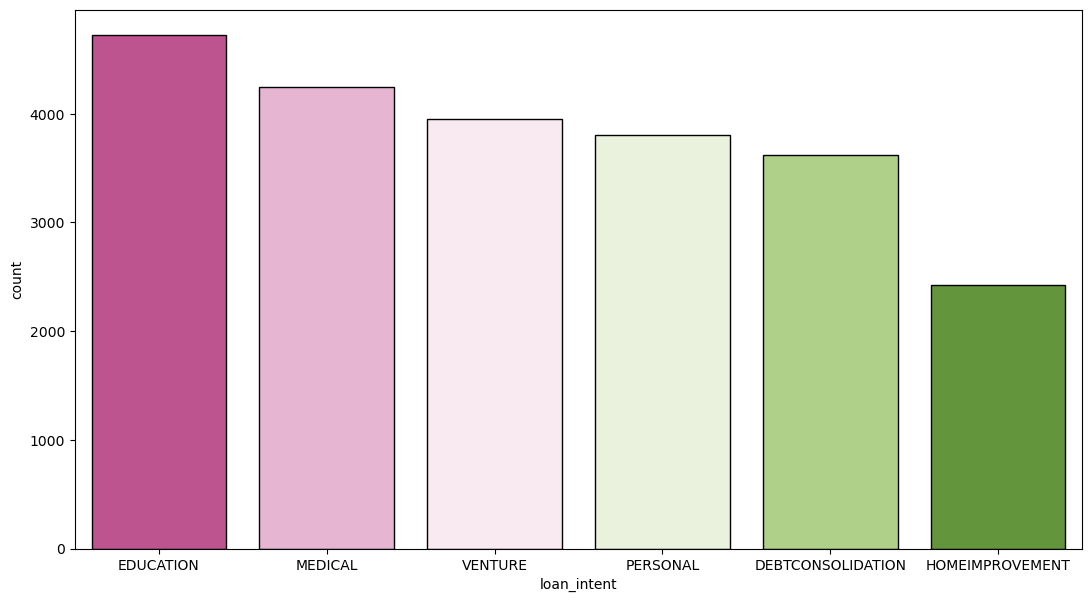

In [53]:
plt.figure(figsize = (13,7))
sns.countplot(x = 'loan_intent', data = df, palette = 'PiYG', edgecolor = 'k', order = ['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT'])
plt.show();

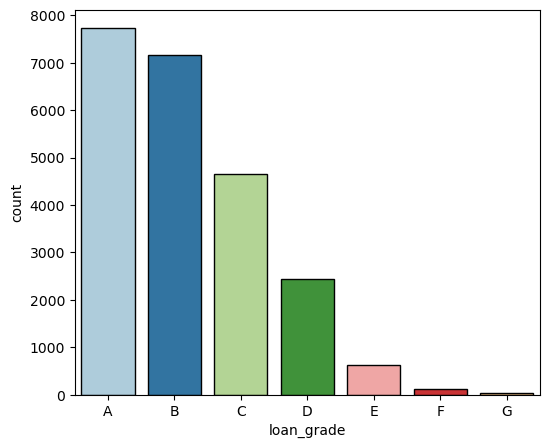

In [54]:
plt.figure(figsize = (6,5))
sns.countplot(x = 'loan_grade', data = df, palette = 'Paired', edgecolor = 'k', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show();

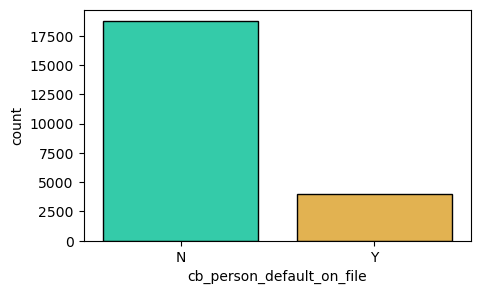

In [55]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'cb_person_default_on_file', data = df, palette = 'turbo', edgecolor = 'k', order = ['N', 'Y'])
plt.show();

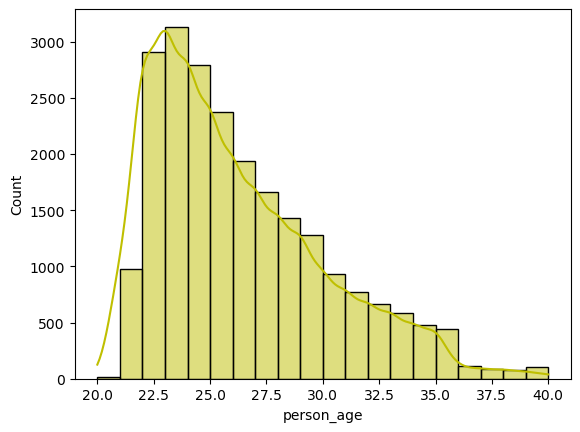

In [56]:
sns.histplot(x = 'person_age', data = df, color = 'y', edgecolor = 'k', kde = True, bins = 20)
plt.show();

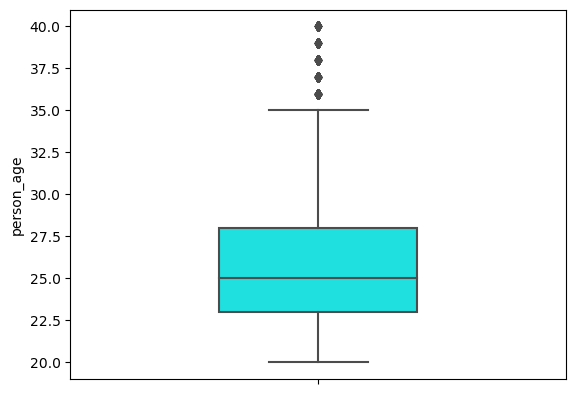

In [57]:
sns.boxplot(y = 'person_age', data = df, width = 0.4, color = 'cyan')
plt.show();

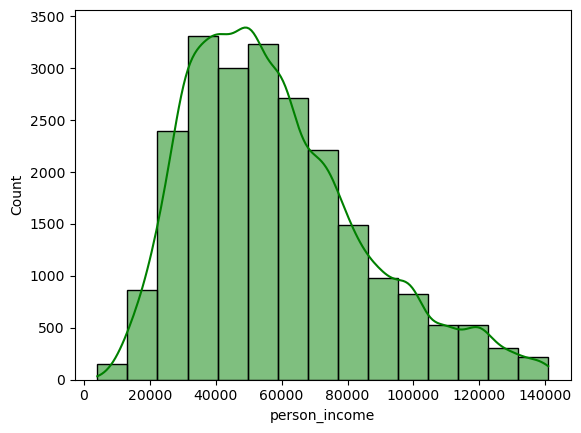

In [58]:
sns.histplot(x = 'person_income', data = df, color = 'green', edgecolor = 'k', kde = True, bins = 15)
plt.show();

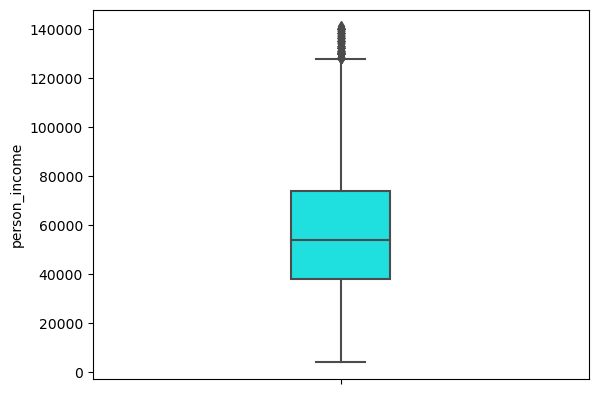

In [59]:
sns.boxplot(y = 'person_income', data = df, width = 0.2, color = 'cyan')
plt.show();

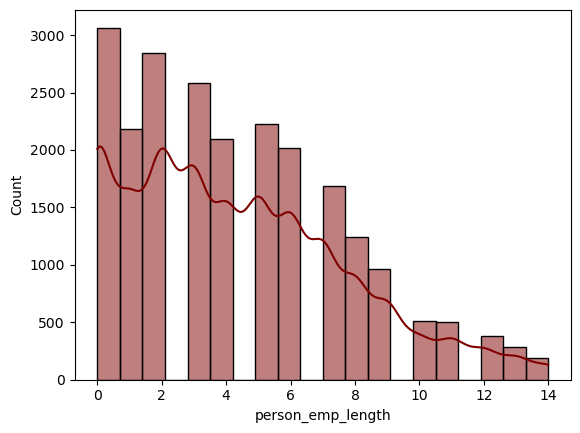

In [60]:
sns.histplot(x = 'person_emp_length', data = df, color = 'maroon', edgecolor = 'k', kde = True, bins = 20)
plt.show();

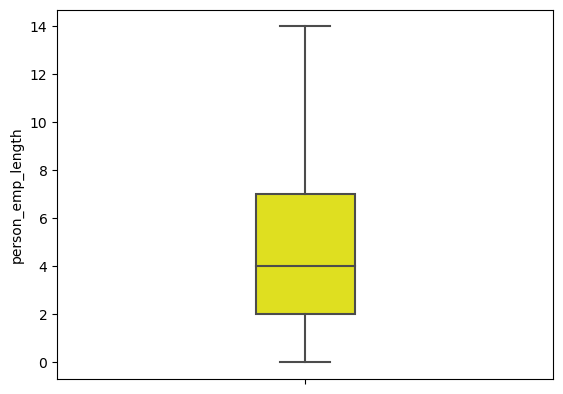

In [61]:
sns.boxplot(y = 'person_emp_length', data = df, width = 0.2, color = 'yellow')
plt.show();

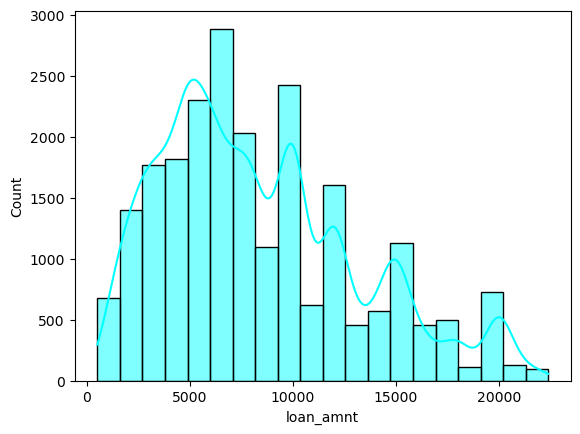

In [62]:
sns.histplot(x = 'loan_amnt', data = df, color = 'cyan', edgecolor = 'k', kde = True, bins = 20)
plt.show();

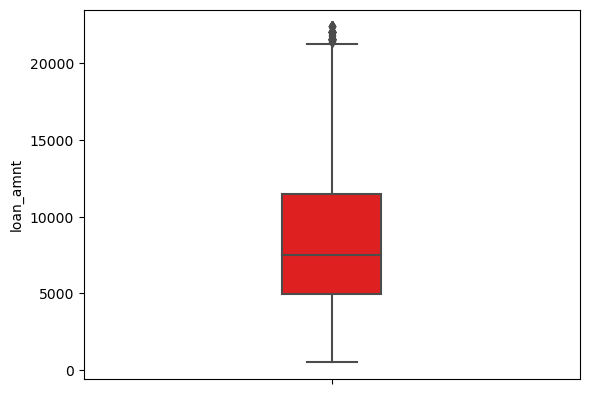

In [63]:
sns.boxplot(y = 'loan_amnt', data = df, width = 0.2, color = 'red')
plt.show();

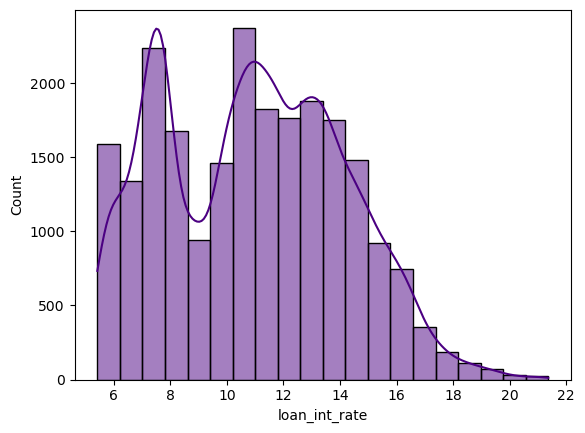

In [64]:
sns.histplot(x = 'loan_int_rate', data = df, color = 'indigo', edgecolor = 'k', kde = True, bins = 20)
plt.show();

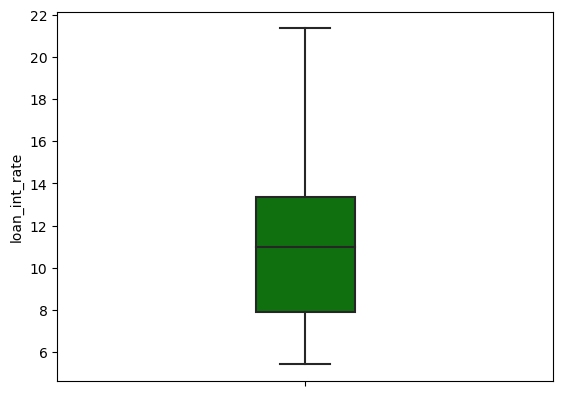

In [65]:
sns.boxplot(y = 'loan_int_rate', data = df, width = 0.2, color = 'green')
plt.show();

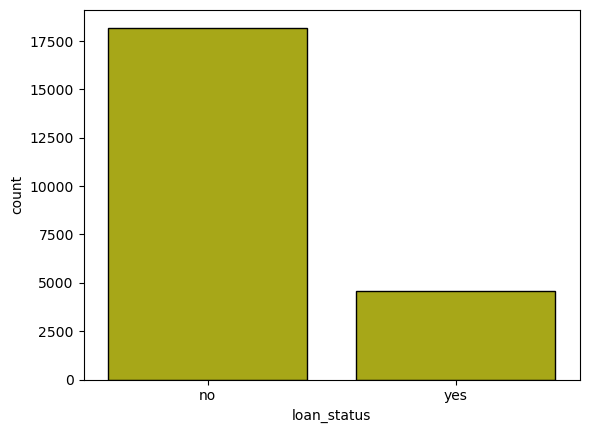

In [66]:
sns.countplot(x = 'loan_status', data = df, color = 'y', edgecolor = 'k')
plt.show();

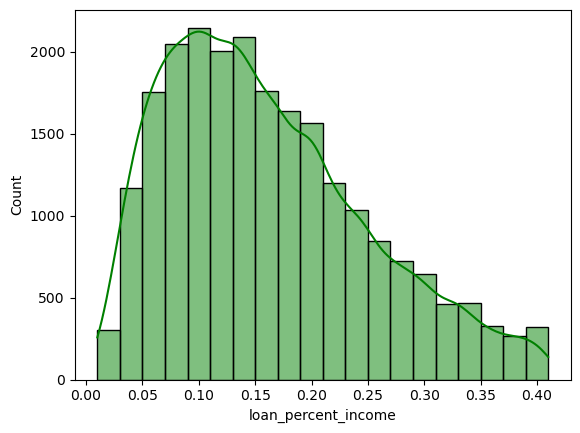

In [67]:
sns.histplot(x = 'loan_percent_income', data = df, color = 'green', edgecolor = 'k', kde = True, bins = 20)
plt.show();

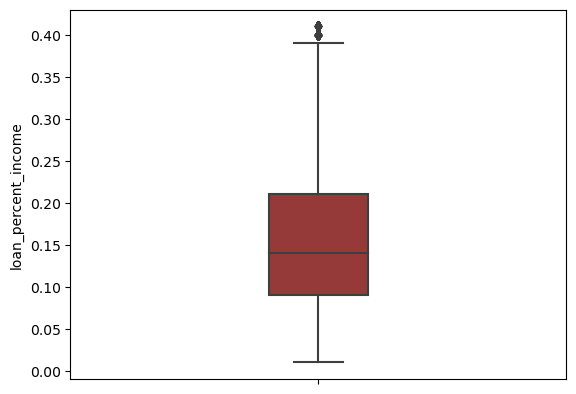

In [68]:
sns.boxplot(y = 'loan_percent_income', data = df, width = 0.2, color = 'brown')
plt.show();

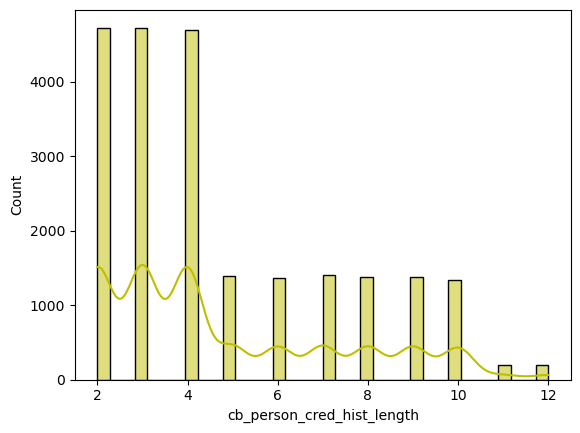

In [69]:
sns.histplot(x = 'cb_person_cred_hist_length', data = df, color = 'y', edgecolor = 'k', kde = True, linewidth = 1)
plt.show();

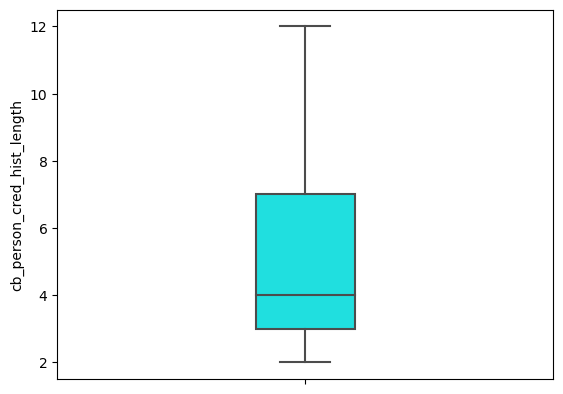

In [70]:
sns.boxplot(y = 'cb_person_cred_hist_length', data = df, width = 0.2, color = 'cyan')
plt.show();

# Bi-Variate Analysis:

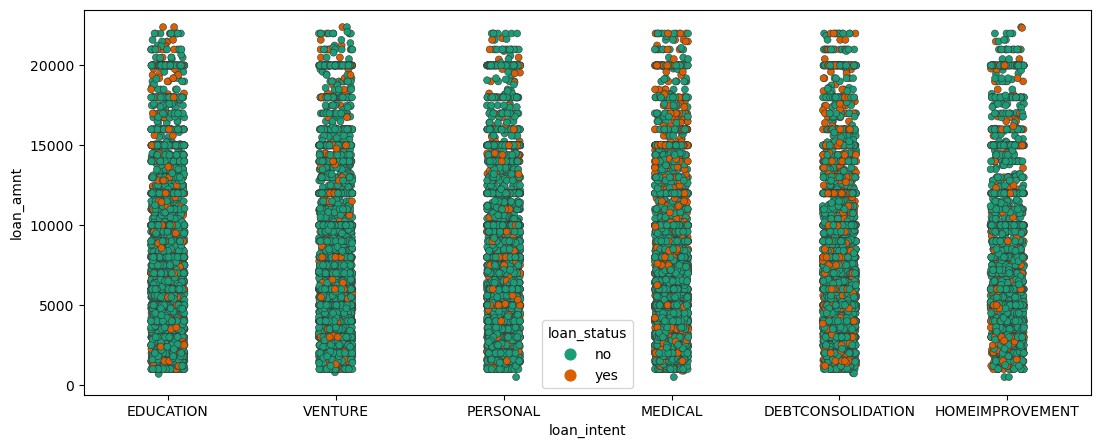

In [71]:
plt.figure(figsize = (13,5))
sns.stripplot(x = 'loan_intent', y = 'loan_amnt', data = df, palette ='Dark2', hue = 'loan_status', jitter = 1, linewidth = 0.4)
plt.show();

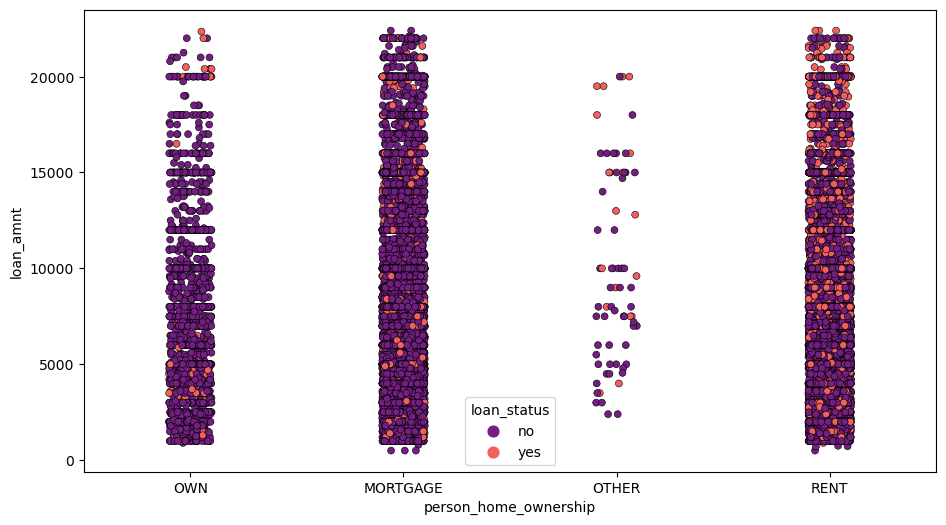

In [72]:
plt.figure(figsize = (11,6))
sns.stripplot(x = 'person_home_ownership', y = 'loan_amnt', data = df, palette ='magma', hue = 'loan_status', jitter = 1, edgecolor = 'k', linewidth = 0.4)
plt.show();

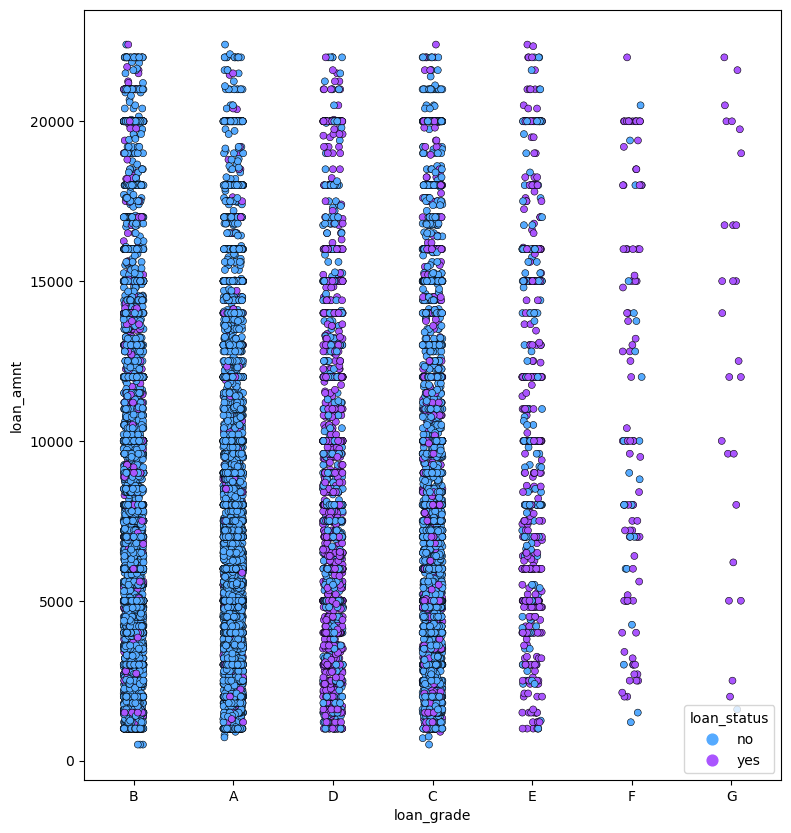

In [73]:
plt.figure(figsize = (9,10))
sns.stripplot(x = 'loan_grade', y = 'loan_amnt', data = df, palette ='cool', hue = 'loan_status', jitter = 1, edgecolor = 'k', linewidth = 0.4)
plt.show();

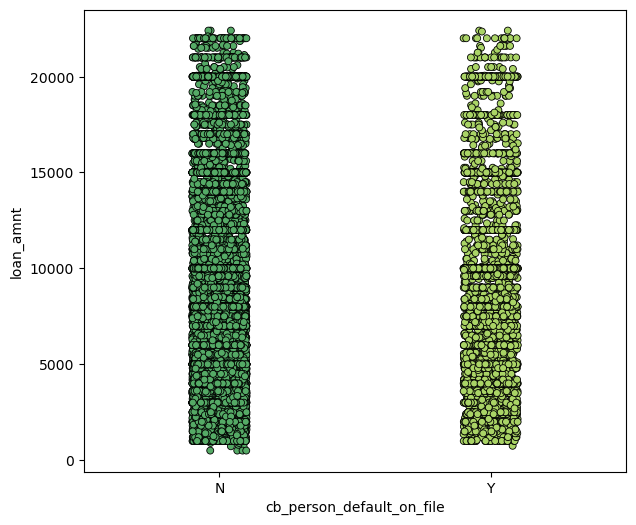

In [74]:
plt.figure(figsize = (7,6))
sns.stripplot(x = 'cb_person_default_on_file', y = 'loan_amnt', data = df, palette ='summer',edgecolor = 'k', linewidth = 0.6)
plt.show();

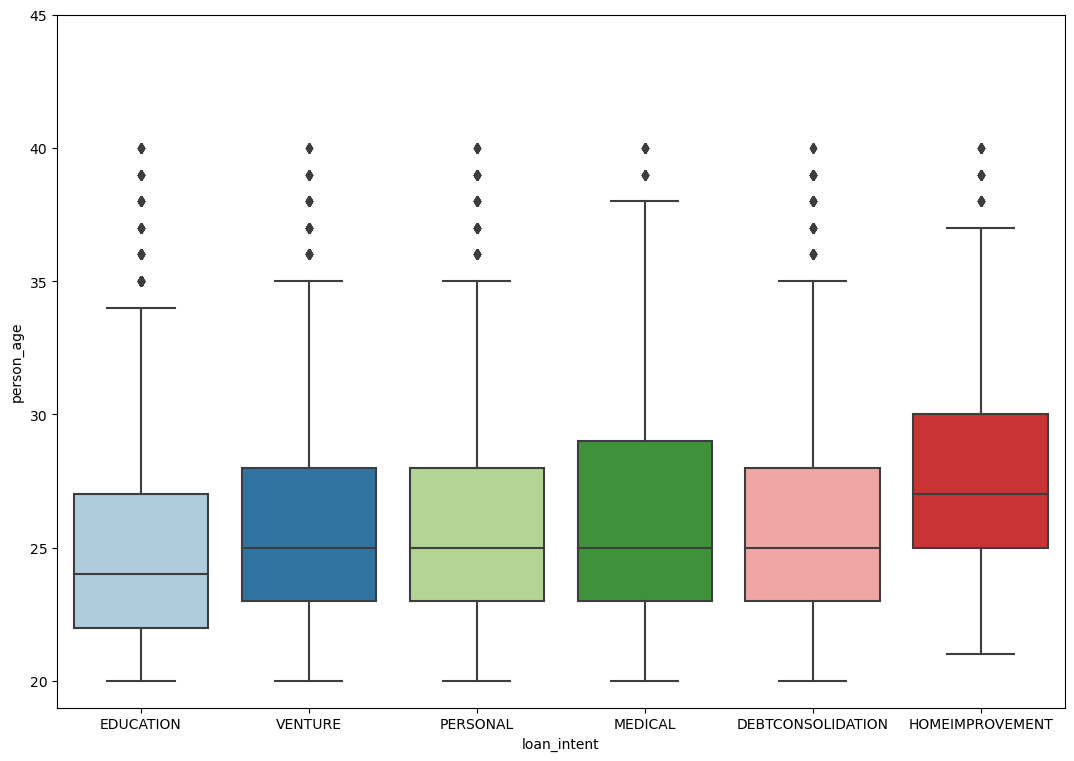

In [75]:
plt.figure(figsize = (13,9))
sns.boxplot(x = 'loan_intent', y = 'person_age', data = df, palette ='Paired')
plt.yticks([20, 25,30, 35, 40, 45])
plt.show();

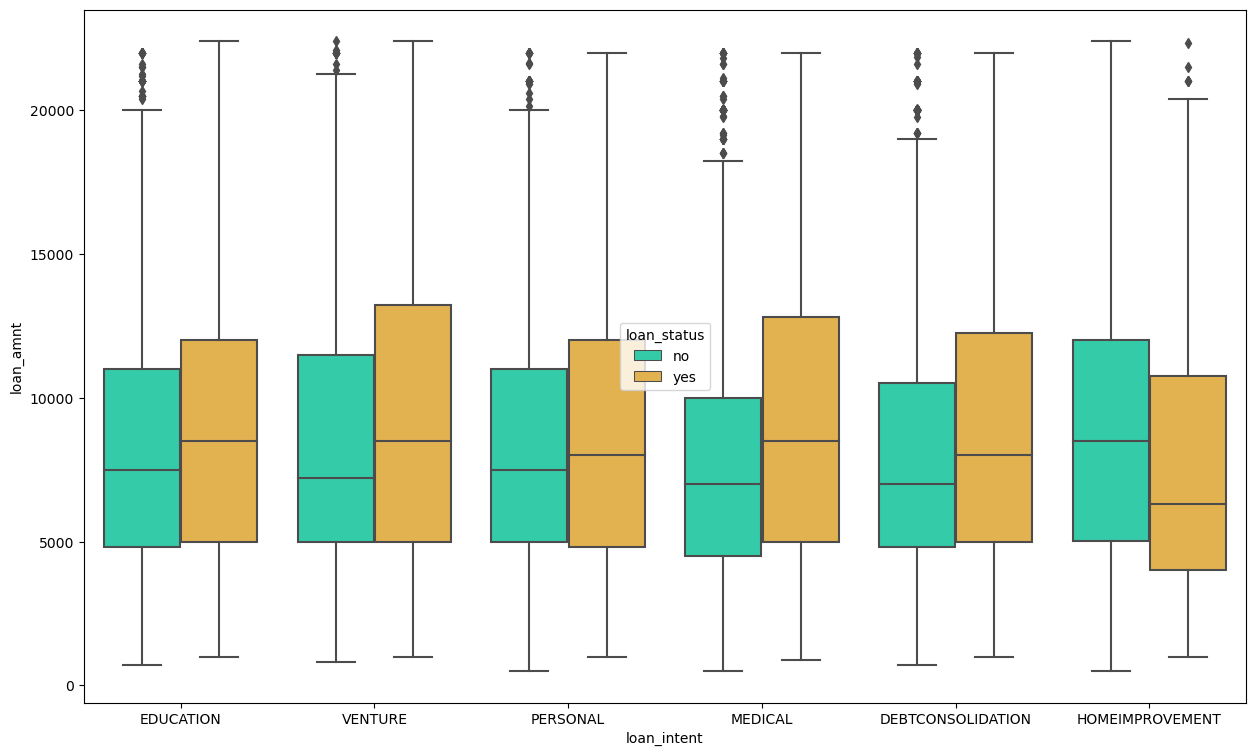

In [76]:
plt.figure(figsize = (15,9))
sns.boxplot(x = 'loan_intent', y = 'loan_amnt', data = df, palette ='turbo', hue = 'loan_status')
plt.show();

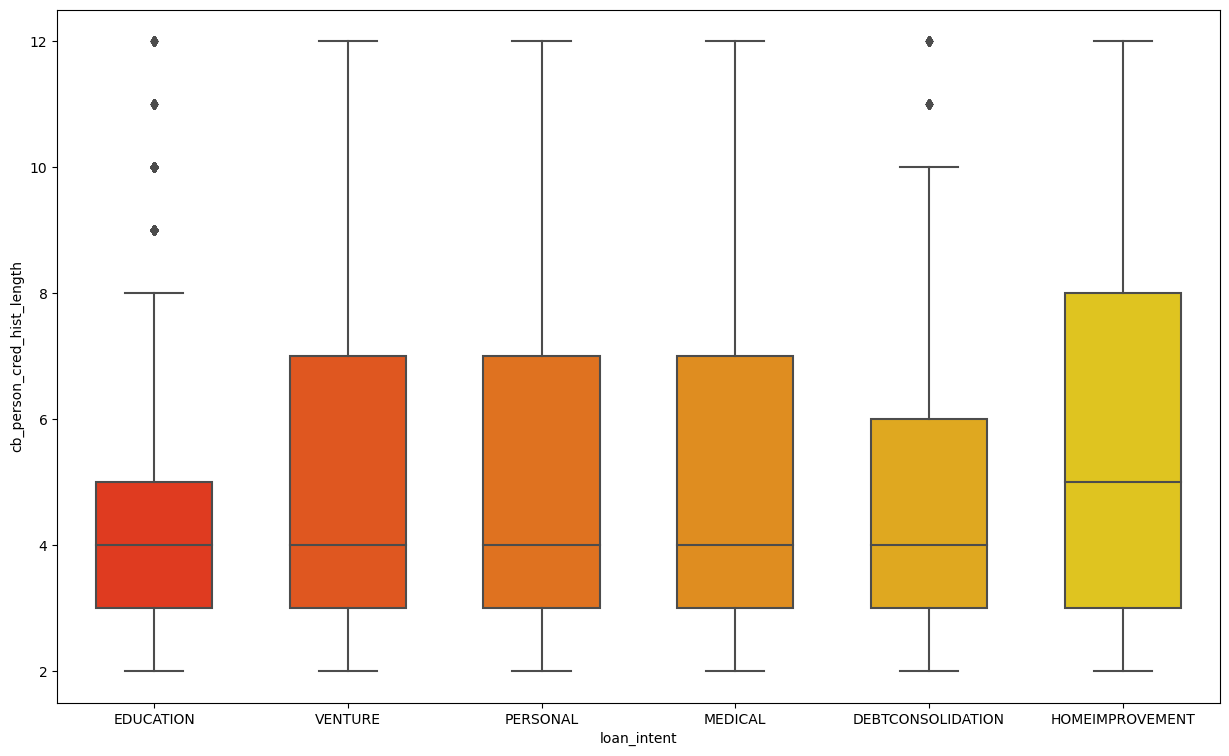

In [77]:
plt.figure(figsize = (15,9))
sns.boxplot(x = 'loan_intent', y = 'cb_person_cred_hist_length', data = df, palette ='autumn',width = 0.6)
plt.show();

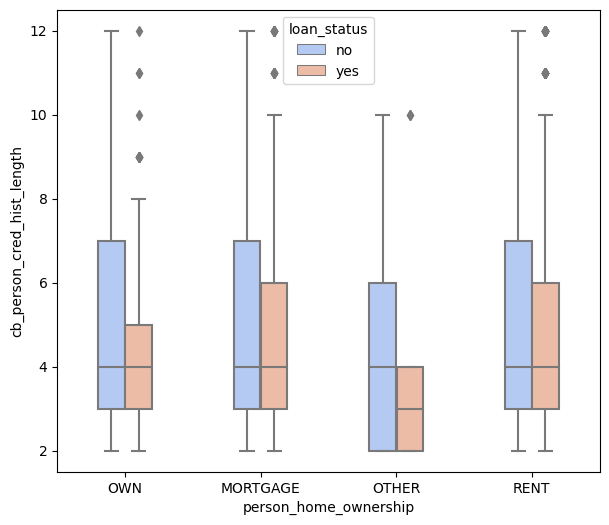

In [78]:
plt.figure(figsize = (7,6))
sns.boxplot(x = 'person_home_ownership', y = 'cb_person_cred_hist_length', data = df, width = 0.4, palette ='coolwarm', hue = 'loan_status')
plt.show();

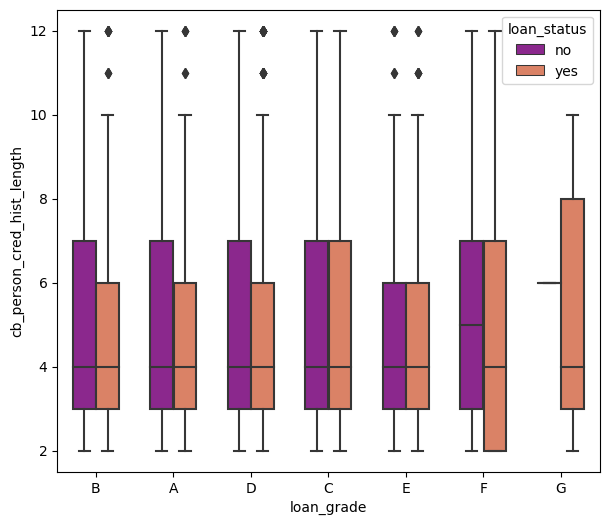

In [95]:
plt.figure(figsize = (7,6))
sns.boxplot(x = 'loan_grade', y = 'cb_person_cred_hist_length', data = df, width = 0.6, palette ='plasma', hue = 'loan_status')
plt.show();

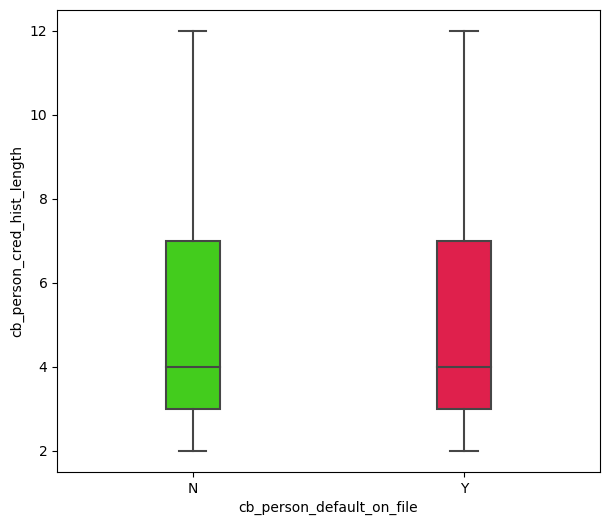

In [80]:
plt.figure(figsize = (7,6))
sns.boxplot(x = 'cb_person_default_on_file', y = 'cb_person_cred_hist_length', data = df, width = 0.2, palette ='prism')
plt.show();

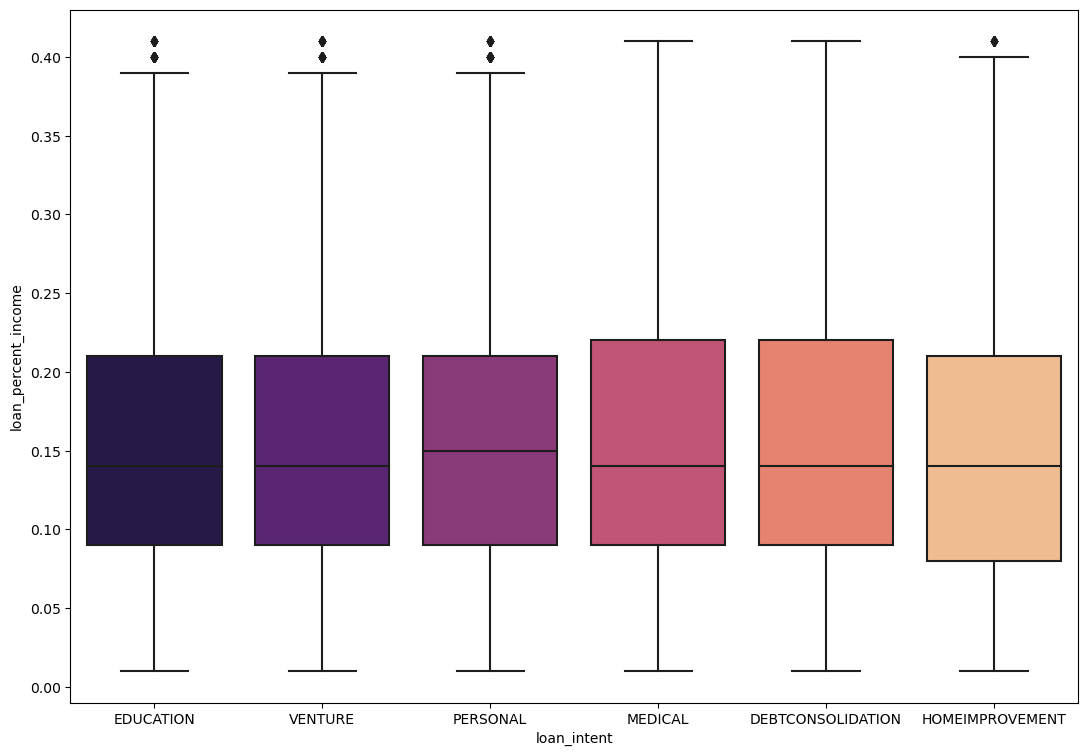

In [81]:
plt.figure(figsize = (13,9))
sns.boxplot(x = 'loan_intent', y = 'loan_percent_income', data = df,  palette ='magma')
plt.show();

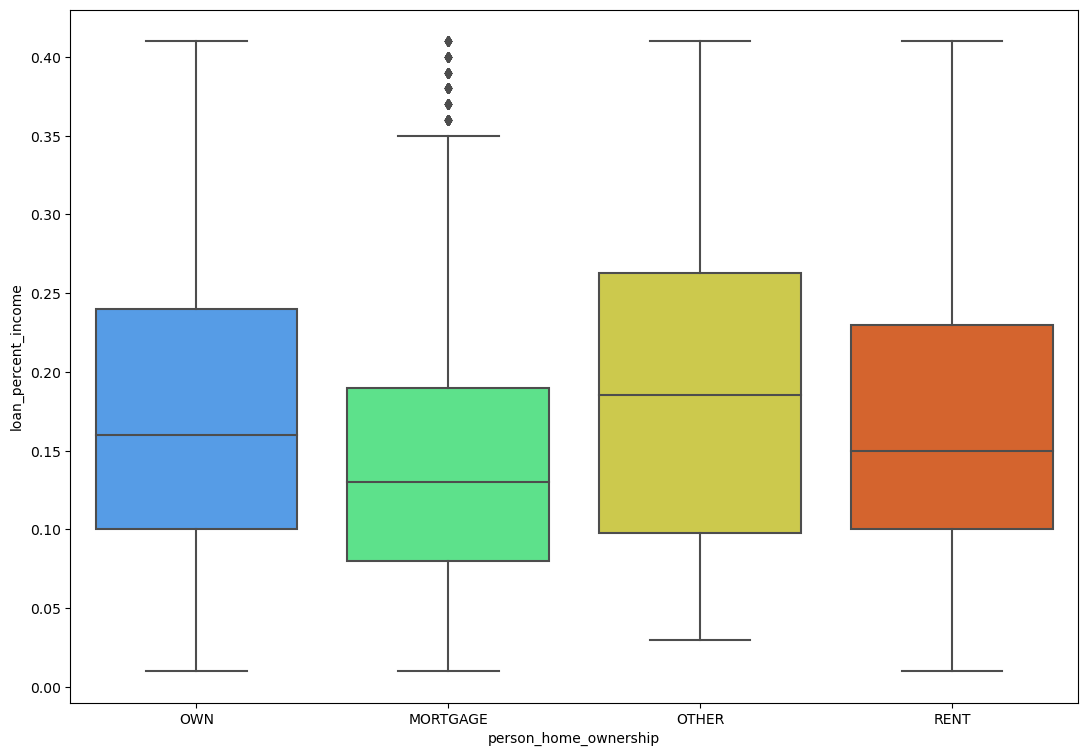

In [82]:
plt.figure(figsize = (13,9))
sns.boxplot(x = 'person_home_ownership', y = 'loan_percent_income', data = df,  palette ='turbo')
plt.show();

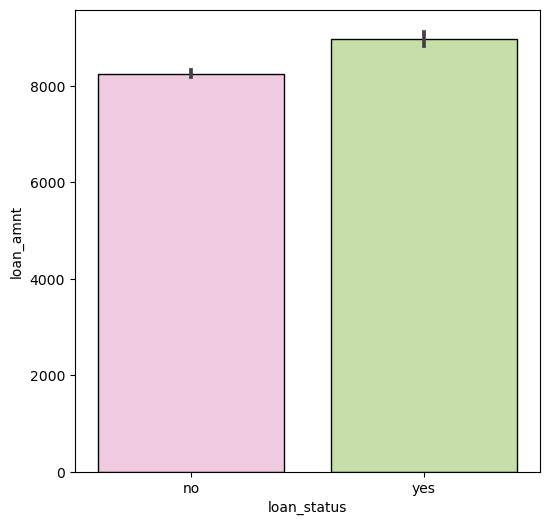

In [83]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'loan_status', y = 'loan_amnt', data = df, palette = 'PiYG', edgecolor = 'k', order = ['no', 'yes'])
plt.show();

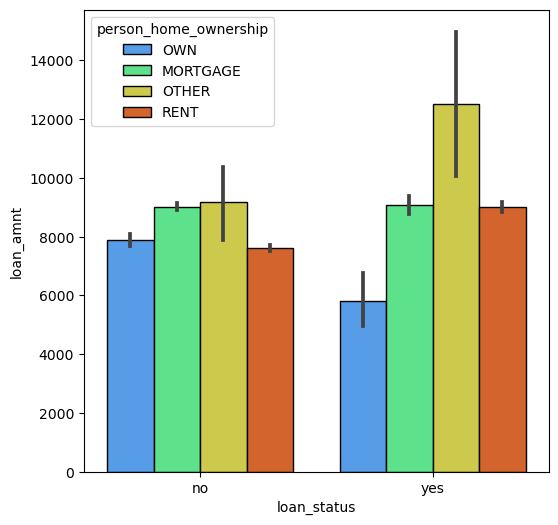

In [84]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'loan_status', y = 'loan_amnt', data = df, hue = 'person_home_ownership', palette = 'turbo', edgecolor = 'k', order = ['no', 'yes'])
plt.show();

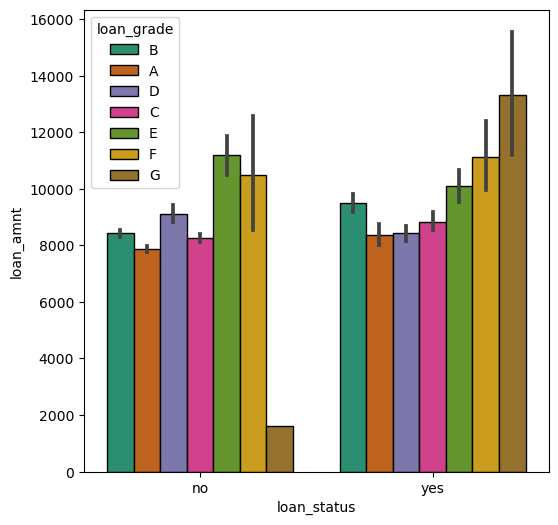

In [85]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'loan_status', y = 'loan_amnt', data = df, hue = 'loan_grade', palette = 'Dark2', edgecolor = 'k', order = ['no', 'yes'])
plt.show();

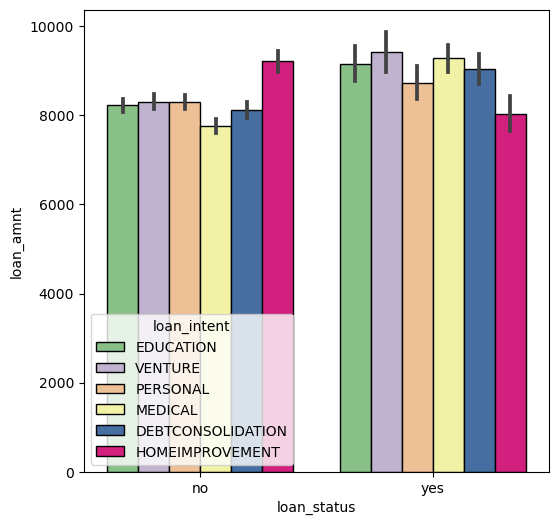

In [86]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'loan_status', y = 'loan_amnt', data = df, hue = 'loan_intent', palette = 'Accent', edgecolor = 'k', order = ['no', 'yes'])
plt.show();

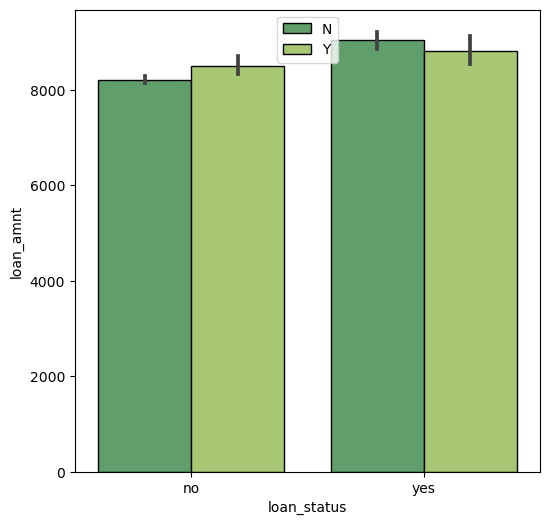

In [87]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'loan_status', y = 'loan_amnt', data = df, hue = 'cb_person_default_on_file', palette = 'summer', edgecolor = 'k', order = ['no', 'yes'])
plt.legend(loc = 9)
plt.show();

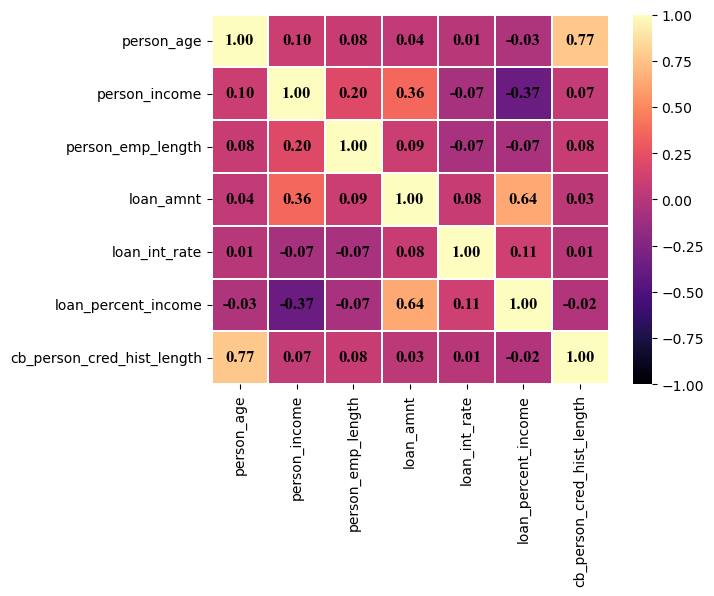

In [94]:
labels = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
sns.heatmap(df.corr(), cmap = 'magma',center = 0, vmin = -1, vmax = 1, annot = True,
                                                                    fmt = ".2f", annot_kws = {
                                                                    'fontsize':12,
                                                                    'fontweight':'bold',
                                                                    'fontfamily':'Times new roman',
                                                                    'color':'k'
                                                                     },
                                                                     linewidth = 0.1,
                                                                     linecolor = 'w',
                                                                     xticklabels = labels, 
                                                                     yticklabels = labels);

# Step-1:

# Identifying inputvariables (X) and Output Variable (or) Target Variable (y)

In [ ]:
y = ['loan_status']
X = [['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']]

# Step-2:

# Splitting the data into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('loan_status',axis=1),df["loan_status"],test_size=0.30,random_state=42)

In [ ]:
df

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Step-3:

# Data Preparation on Train Data:

In [ ]:
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_cat.head()

In [ ]:
X_train_cat['person_home_ownership'].value_counts(normalize = True)

In [ ]:
X_train_cat['loan_intent'].value_counts(normalize = True)

In [ ]:
X_train_cat['cb_person_default_on_file'].value_counts(normalize = True)

In [ ]:
X_train_cat['loan_grade'].value_counts(normalize = True)

# Applying One Hot Encoding on all categorical columns except loan_grade column of Training Data:

In [ ]:
X_train_cat_ohe = X_train_cat[['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']]
indx_= X_train_cat[['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']]
X_train_cat_ohe.head()

In [ ]:
X_train_cat_le = X_train_cat[['loan_grade']]
X_train_cat_le.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe_encoder_object = OneHotEncoder(drop = 'first', sparse = False) 
ohe_encoder_object

In [ ]:
X_train_cat_ohe = X_train_cat[['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']]
indes_names_oe = X_train_cat_ohe.columns.tolist()
X_train_cat_OHE = pd.DataFrame(ohe_encoder_object.fit_transform(X_train_cat_ohe), columns =ohe_encoder_object.get_feature_names_out(indes_names_oe ), index =X_train_cat_ohe.index)
X_train_cat_OHE

In [ ]:
df

In [ ]:
X_train_cat_ohe

# Applying Label Encoding on loan_grade column of Training Data:

In [ ]:
X_train_cat_le.loan_grade.unique()

In [ ]:
loan_grade_le_encoder = {'A':7, 'B':6, 'C':5, 'D':4, 'E':3, 'F':2, 'G':1}
X_train_cat_LE = X_train_cat_le['loan_grade'].apply(lambda X:loan_grade_le_encoder[X])
X_train_cat_LE.head()

# Concatenating both X_train_cat_OHE and X_train_cat_LE DataFrames:

In [ ]:
X_train_cat_transformed = pd.concat([X_train_cat_OHE, X_train_cat_LE], axis = 1)
X_train_cat_transformed.head()

In [ ]:
X_train_num = X_train.select_dtypes(include =['float64', 'int64'])
X_train_num.head()

# Applying Standardization technique on numerical columns in training data:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_object = StandardScaler()

In [ ]:
X_train_num_rescaled = pd.DataFrame(scaler_object.fit_transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index)
X_train_num_rescaled.head()

In [ ]:
print("Number of Numerical Features:", scaler_object.n_features_in_)
print("Mean of each column:", scaler_object.mean_)
print("standardization of each column:", np.sqrt(scaler_object.var_))

# Concatenating both Numerical Columns and Categorical Columns of Training Data:

In [ ]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_transformed],axis=1)
X_train_transformed.head()

# Step-4:

# Building a Model by using Logistic Regression Classifier Algorithm:

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_classifier_object = LogisticRegression()
LR_classifier_object.fit(X_train_transformed, y_train)

# Step-5:

# Data Preparation on Test Data:

In [ ]:
X_test.shape

In [ ]:
X_test.info()

In [ ]:
X_test_cat = X_test.select_dtypes(include = ['object'])
X_test_cat.head()

In [ ]:
X_test_cat_le = X_test_cat[['loan_grade']]
X_test_cat_le.head()

# Applying One Hot Encoding on all categorical columns except loan_grade column of Test Data:

In [ ]:
X_test_cat_ohe = X_test_cat[['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']]
indes_names_oe = X_test_cat_ohe.columns.tolist()
X_test_cat_OHE = pd.DataFrame(ohe_encoder_object.transform(X_test_cat_ohe), columns =ohe_encoder_object.get_feature_names_out(indes_names_oe ), index =X_test_cat_ohe.index)
X_train_cat_OHE

# Applying Label Encoding on loan_grade column of Test Data:

In [ ]:
X_test_cat_LE = X_test_cat_le['loan_grade'].apply(lambda X:loan_grade_le_encoder[X])
X_test_cat_LE.head()

# Concatenating both X_test_cat_OHE and X_test_cat_LE DataFrames:

In [ ]:
X_test_cat_transformed = pd.concat([X_test_cat_OHE, X_test_cat_LE], axis = 1)
X_test_cat_transformed.shape

# Applying Standardization technique on numerical columns in test data:

In [ ]:
X_test_num = X_test.select_dtypes(include =['float64', 'int64'])
X_test_num.shape

In [ ]:
X_test_num.head()

In [ ]:
X_test_num_rescaled = pd.DataFrame(scaler_object.transform(X_test_num), columns = X_test_num.columns, index = X_test_num.index)
X_test_num_rescaled.head()

# Concatenating both Numerical Columns and Categorical Columns of Test Data:

In [ ]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_transformed], axis = 1)
X_test_transformed

In [ ]:
X_test_num_rescaled.head()

In [ ]:
 X_test_cat_transformed.head()

# Step-6:

# Predictions on Test Data

In [ ]:
y_test_prediction = LR_classifier_object.predict(X_test_transformed)

# Comparing the Actual Values and Predicted Values of Test Data

In [ ]:
temp_df = pd.DataFrame({'Actual Values':y_test, 'Prediction Values':y_test_prediction})
temp_df

# Step-7:

# Evaluation of Test Data

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_prediction)

# 2.Building a Model by using KNN Classifier Algorithm:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier_object = KNeighborsClassifier()
KNN_classifier_object.fit(X_train_transformed, y_train)

# Predictions on Test Data

In [ ]:
y_test_prediction = KNN_classifier_object.predict(X_test_transformed)

# Comparing the Actual Values and Predicted Values of Test Data

In [ ]:
temp_df = pd.DataFrame({'Actual Values':y_test, 'Prediction Values':y_test_prediction})
temp_df

# Evaluation of Test Data

In [ ]:
metrics.accuracy_score(y_test, y_test_prediction)

# 3. Building a Model by using Decision Tree Classifier Algorithm:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier_object = DecisionTreeClassifier()
DT_classifier_object.fit(X_train_transformed, y_train)

# Predictions on Test Data

In [ ]:
y_test_prediction = DT_classifier_object.predict(X_test_transformed)

# Comparing the Actual Values and Predicted Values of Test Data

In [ ]:
temp_df = pd.DataFrame({'Actual Values':y_test, 'Prediction Values':y_test_prediction})
temp_df

# Evaluation of Test Data

In [ ]:
metrics.accuracy_score(y_test, y_test_prediction)

# 4. Building a Model by using Random Forest Classifier Algorithm:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier_object = RandomForestClassifier()
RF_classifier_object.fit(X_train_transformed, y_train)

# Predictions on Test Data

In [ ]:
y_test_prediction = RF_classifier_object.predict(X_test_transformed)

# Comparing the Actual Values and Predicted Values of Test Data

In [ ]:
temp_df = pd.DataFrame({'Actual Values':y_test, 'Prediction Values':y_test_prediction})
temp_df

# Evaluation of Test Data

In [ ]:
metrics.accuracy_score(y_test, y_test_prediction)